# **The Basics: Training Your First Deep Learning Model**

## **1) Import Libraries**

In [1]:
#!pip install livelossplot

In [2]:
import tensorflow as tf
import numpy as np
import logging

from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.utils import plot_model
from IPython.display import SVG, Image
from livelossplot import PlotLossesKerasTF

logger = tf.get_logger()
logger.setLevel(logging.ERROR)

## **2) Set up training data**

I made this dataset by inserting values into the function y=1.5x+10.
Our model will internally create these weights 1.5 and 10 after training the model using the dataset


In [3]:
x = np.array([-40, -10,  0,  8, 15, 22,  38],  dtype=float)
y = np.array([-50,  -5, 10, 22, 32.5, 43, 67],  dtype=float)

## ***3) Create the model***


> ### Build a layer



In [4]:
layer = tf.keras.layers.Dense(units=1, input_shape=[1])

> ### Assemble layers into the model



In [5]:
model = tf.keras.Sequential([layer])


> ## Compile the model, with loss and optimizer functions

In [6]:
model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(0.1),metrics=['accuracy'])
reduce_lr = ReduceLROnPlateau(monitor='loss', factor=0.1, patience=2, min_lr=0.00001, mode='min'),
checkpoint = ModelCheckpoint("model_weights.h5", monitor='accuracy',save_weights_only=True, mode='max', verbose=1),
callbacks = [PlotLossesKerasTF(), checkpoint, reduce_lr]

## **4) Train the model**

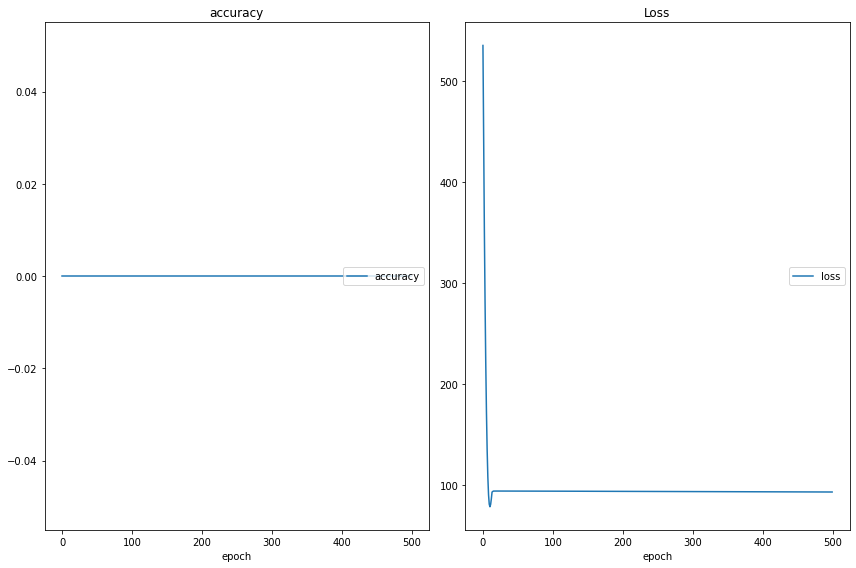

accuracy
	accuracy         	 (min:    0.000, max:    0.000, cur:    0.000)
Loss
	loss             	 (min:   78.438, max:  535.317, cur:   93.028)

Epoch 00500: saving model to model_weights.h5
Finished training the model


In [7]:
history = model.fit(x, y, epochs=500, verbose=False, callbacks=callbacks)
print("Finished training the model")

## **5) Display training statistics**

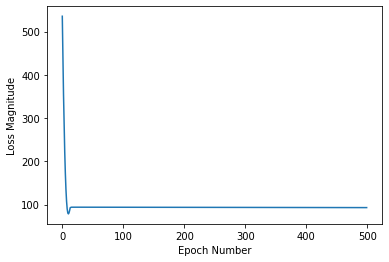

In [8]:
import matplotlib.pyplot as plt
plt.xlabel('Epoch Number')
plt.ylabel("Loss Magnitude")
plt.plot(history.history['loss'])

## **6) Use the model to predict values**

In [9]:
print(model.predict([100.0]))

[[177.57791]]


##**Looking at the layer weights**

Finally, let's print the internal variables of the Dense layer. 

We can get the weights using the function **get_weights()** inside our layer object.

we made a layer in step 3,  
layer = tf.keras.layers.Dense(units=1, input_shape=[1])

In [10]:
a= layer.get_weights()[0][0][0]
b= layer.get_weights()[1][0]
print("These are the layer variables: a = {} & b = {}".format(a,b))

These are the layer variables: a = 1.7629262208938599 & b = 1.2852888107299805


Our function was y=1.5x+10.

The layer weights made by our Neural Network is close to that value. 